In [1]:
import pandas as pd
import matplotlib.pyplot s plt
import seaborn as sns


In [2]:
reviews = pd.read_json("mard/mard_reviews.json" , lines=True)

In [4]:
reviews.head()

,reviewerID,amazon-id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
0,A1OFY4ATO7D13W,0026197898,"Jacob Shepich ""Neo-Luddite""","[2, 2]",1355702400,Buy this album. Now. Don't worry about the re...,5,"12 17, 2012",PITCHFORK Eat your heart out!
1,A2KH83L1F70QR8,0026197898,"John Stockton ""JLS""","[1, 1]",1358121600,The Sudden Passion did a great job with this o...,5,"01 14, 2013",Americana from the Southlands
2,A1KGXC7IRLVJR3,0615205399,"Amy Elizabeth ""Amy""","[0, 0]",1214438400,I received this CD as a gift a few weeks ago f...,5,"06 26, 2008",It really works!
3,A1BT6LQ9NY6RO3,0615205399,"Jasa Swaze ""Jasa Swaze""","[1, 1]",1214352000,I am a beginner and have tried a couple of med...,5,"06 25, 2008",Change Your LIfe for the Better!
4,A206OKO2FE2IPL,0615205399,J. Jenson,"[1, 1]",1229212800,This is coming from a person that didn't belie...,5,"12 14, 2008",Mediation couldn't get any easier


In [5]:
numUsers = len(pd.unique(reviews['reviewerID']))
numAlbums = len(pd.unique(reviews['amazon-id']))
numReviews = len(reviews)

print("Number of Users:" , numUsers)
print("Number of Albums:", numAlbums)
print("Number of Reviews:", numReviews)

Number of Users: 187090
Number of Albums: 64637
Number of Reviews: 263525


In [6]:
reviews['helpful'].value_counts()

helpful
[0, 0]        103716
[1, 1]         34090
[2, 2]         16826
[0, 1]         10359
[3, 3]          9730
               ...  
[5, 238]           1
[2, 56]            1
[484, 509]         1
[66, 68]           1
[19, 75]           1
Name: count, Length: 2084, dtype: int64

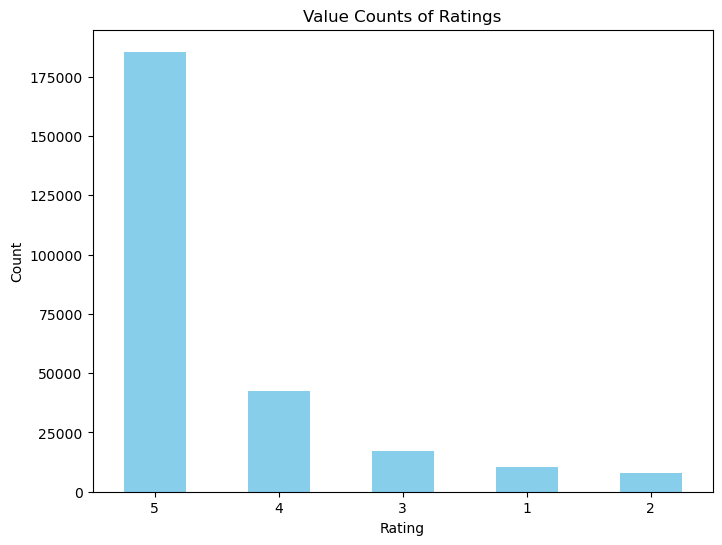

In [7]:
rating_counts = reviews['overall'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

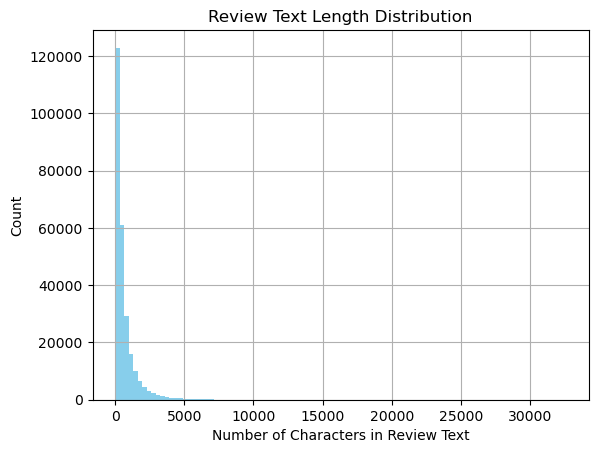

In [8]:
reviews["reviewTextLength"] = reviews["reviewText"].apply(lambda x : len(x))
reviews["reviewTextLength"].hist(bins=100, color="skyblue")
plt.xlabel('Number of Characters in Review Text')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Review Text Length Distribution')  # Title for the plot
plt.show()

In [19]:
a = "While Scudiere's writing skills aren't the greatest, this is a good story & I enjoyed it a lot.  You have to suspend your credulity at a couple of points, but he does bring it all together by the end of the book.  There is an abrupt change in the storyline that comes with no warning & no explanation.  It was several pages before I was able to figure it out.  Other than that it was a fun & quick read & I'm glad I read it."
for i,review in reviews.iterrows():
    text = review['reviewText']
    if text == a:
        print(review)
        break
    if i == 1000:
        break

reviewerID                                            AQKIMQUL9ZYUD
amazon-id                                                097995102X
reviewerName                               Juliette "angelsjoy2000"
helpful                                                      [0, 0]
unixReviewTime                                           1352246400
reviewText        While Scudiere's writing skills aren't the gre...
overall                                                           3
reviewTime                                               11 7, 2012
summary                                                     Hmmm...
Name: 157, dtype: object


/Users/lucasderr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucasderr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucasderr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


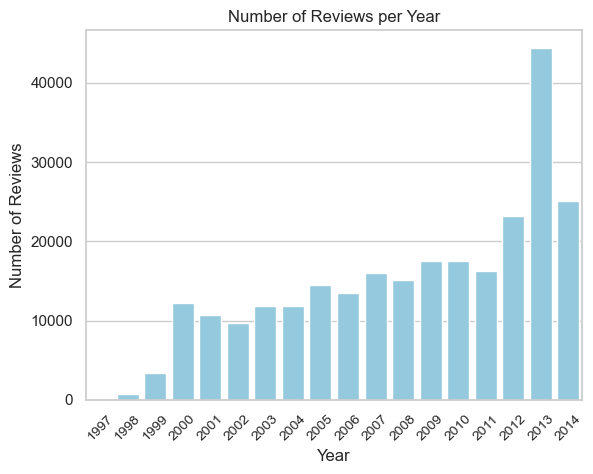

In [9]:
def get_year(time):
    length = len(time)
    start = length-4
    return int(time[start:])

reviews['year'] = reviews["reviewTime"].apply(get_year)

yearly_counts = reviews['year'].value_counts().reset_index()
yearly_counts.columns = ['year', 'count']

# Create a bar plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
ax=sns.barplot(data=yearly_counts, x='year', y='count', color="skyblue")
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Number of Reviews')  # Label for the y-axis
plt.title('Number of Reviews per Year')  # Title for the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
plt.show()

In [10]:
reviews['year'].value_counts()

year
2013    44422
2014    25067
2012    23251
2009    17528
2010    17464
2011    16273
2007    16025
2008    15137
2005    14512
2006    13443
2000    12219
2004    11851
2003    11844
2001    10687
2002     9638
1999     3397
1998      759
1997        8
Name: count, dtype: int64

In [20]:
content_data = pd.read_json("mard/mard_metadata.json", lines=True)
print(len(content_data))
content_data.head()

65566


,price,artist-mbid,imUrl,confidence,categories,release-group-mbid,amazon-id,root-genre,title,artist,label,artist_url,first-release-year,release-mbid,songs,salesRank,related,brand
0,14.23,6ce5815b-b277-48b0-94c9-a87a8f0422b3,http://ecx.images-amazon.com/images/I/6139OLQU...,1.0,"[[CDs & Vinyl, Alternative Rock, Indie & Lo-Fi...",b05be7e9-6bc4-422b-8198-32945b0d1c76,0026197898,Alternative Rock,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,359b564b-3db4-44ad-9481-0b45f24aa53e,[{'mbid': '308af531-5fa7-4dd8-969c-6bb7a204eb1...,NaN,NaN,NaN
1,29.98,NaN,http://ecx.images-amazon.com/images/I/51rKlhSe...,NaN,"[[CDs & Vinyl, Alternative Rock, American Alte...",NaN,1902593375,Alternative Rock,Become the Media,Jello Biafra,AK Press,/Jello-Biafra/e/B000APYL8M,NaN,NaN,NaN,{'Music': 902130},NaN,NaN
2,7.18,eb0cd72f-0235-47ec-9d0b-f244a2afc3b7,http://ecx.images-amazon.com/images/I/51x8skEG...,1.0,"[[CDs & Vinyl, Alternative Rock]]",bc2acb6a-4998-3cd3-97e2-61025ed8a562,630251228X,Alternative Rock,Exile,Geoffrey Oryema,emi france,/Geoffrey-Oryema/e/B000APWJ7M,1990,2bbfcc1d-d1a3-460c-bb45-ca1b2b48c8c4,[{'mbid': '2995847a-95ce-4182-aebd-92499e98f73...,{'Music': 530408},"{'also_bought': ['B000000HOX', 'B008B2IJ02', '...",NaN
3,16.18,NaN,http://ecx.images-amazon.com/images/I/217zrfsw...,NaN,"[[CDs & Vinyl, Alternative Rock]]",NaN,B00000007O,Alternative Rock,Stories of the New West,Kent 3,Super Electro,/Kent-3/e/B000APW5GM,NaN,NaN,NaN,{'Music': 776497},NaN,NaN
4,NaN,b0a16d0c-3d99-487d-be88-902131ad03d3,http://ecx.images-amazon.com/images/I/51OK3665...,1.0,"[[CDs & Vinyl, Alternative Rock, Indie & Lo-Fi...",410326cf-4a38-35d3-93d9-a63f8fb77b5b,B0000004JL,Alternative Rock,Wesley Willis,Wesley Willis,Fuse Records,/Wesley-Willis/e/B000APWAAI,1995,d22e418c-679d-42c0-991f-7ca12df854e8,[{'mbid': '0dccf187-7b1e-47a0-8b44-1844b9243ee...,{'Music': 844130},"{'also_viewed': ['B00004Y6SW', 'B000002MBE', '...",NaN


In [21]:
amazon_id = "097995102X"
t = content_data[content_data["amazon-id"]==amazon_id]
t

,price,artist-mbid,imUrl,confidence,categories,release-group-mbid,amazon-id,root-genre,title,artist,label,artist_url,first-release-year,release-mbid,songs,salesRank,related,brand
36243,60.14,NaN,http://ecx.images-amazon.com/images/I/61E%2Bi8...,NaN,"[[CDs & Vinyl, Pop]]",NaN,097995102X,Pop,Resonance-The Audiomovie,A.J. Scudiere,CD Baby,/A.J.-Scudiere/e/B002BM82S2,NaN,NaN,NaN,{'Music': 1738311},NaN,NaN


In [13]:
# this code checks that each unique amazon id from reviews exists in the content data
all_ids_match = reviews['amazon-id'].isin(content_data['amazon-id']).all()
all_ids_match

True

In [57]:
neil = content_data[content_data["artist"] == "Neil Young"]
neil

,price,artist-mbid,imUrl,confidence,categories,release-group-mbid,amazon-id,root-genre,title,artist,label,artist_url,first-release-year,release-mbid,songs,salesRank,related,brand
57059,4.99,75167b8b-44e4-407b-9d35-effe87b223cf,http://ecx.images-amazon.com/images/I/514A1YYC...,1.000000,"[[CDs & Vinyl, Rock]]",e0207e33-af06-3862-baba-f42ca722de0d,B000AA7B0C,Rock,Tonight's the Night,Neil Young,PID,/Neil-Young/e/B000APYJWA,1975,d9ecef28-8f1e-457e-a2c4-561a33534aaf,[{'mbid': '05ba3f54-0ce5-48a6-bf6d-490959ae572...,{'Music': 412672},"{'also_viewed': ['B00009P1O0', 'B000002KCI', '...",NaN
57061,10.69,75167b8b-44e4-407b-9d35-effe87b223cf,http://ecx.images-amazon.com/images/I/51FNBGNC...,1.000000,"[[CDs & Vinyl, Rock, Folk Rock], [CDs & Vinyl,...",a710c7c7-46e6-36ca-9c3c-87c8e79f8daf,B000AA7B1Q,Rock,Rust Never Sleeps,Neil Young,PID,/Neil-Young/e/B000APYJWA,1979,2e4f285f-de26-46cd-8175-81f070a3be18,[{'mbid': '140dbf5c-a2ac-4335-8505-8ce1f594cce...,{'Music': 466875},"{'also_viewed': ['B000002KDG', 'B001VZY4M8', '...",NaN
57063,NaN,75167b8b-44e4-407b-9d35-effe87b223cf,http://ecx.images-amazon.com/images/I/61MNYK1R...,1.000000,"[[CDs & Vinyl, Rock, Country Rock], [CDs & Vin...",52418ea0-7f00-3265-92ae-485de63fcb13,B000AA7AYY,Rock,Neil Young,Neil Young,PID,/Neil-Young/e/B000APYJWA,1968,07f86ad6-a75f-408b-8cb5-fd84ce0759d1,[{'mbid': '43dac896-4f53-4eb8-86bc-8277e972ca9...,{'Music': 1225444},"{'also_viewed': ['B000002KDI', 'B000AA7B1Q']}",NaN
57064,7.98,75167b8b-44e4-407b-9d35-effe87b223cf,http://ecx.images-amazon.com/images/I/617HWXCD...,1.000000,"[[CDs & Vinyl, Rock, Folk Rock], [CDs & Vinyl,...",13b7462a-0764-3ece-946e-314aa01079cf,B000AA7B0M,Rock,Zuma,Neil Young,PID,/Neil-Young/e/B000APYJWA,1975,41332f56-4344-4420-9364-ac0746b3393c,[{'mbid': '14e9424b-5429-4fbd-890a-b07306bee5b...,{'Music': 435818},"{'also_viewed': ['B000002KCI', 'B000002KCN', '...",NaN
57104,13.98,75167b8b-44e4-407b-9d35-effe87b223cf,http://ecx.images-amazon.com/images/I/214PGQ25...,1.000000,"[[CDs & Vinyl, Rock, Folk Rock], [CDs & Vinyl,...",4014d9ed-3f37-3365-93c2-befccff20c2d,B000AYNKOY,Rock,Eldorado,Neil Young,Reprise,/Neil-Young/e/B000APYJWA,1989,6a12f3bc-1bf3-4051-9ed5-f371c619c49f,[{'mbid': '3aa0c3b4-2f50-4657-a710-deb5fdae495...,{'Music': 232754},"{'also_bought': ['B00JROMHM4', 'B00KF1CWF0', '...",NaN
57120,NaN,75167b8b-44e4-407b-9d35-effe87b223cf,http://ecx.images-amazon.com/images/I/51SZ3586...,0.956522,"[[CDs & Vinyl, Rock]]",449a4ba1-f2a9-3ef2-a7a5-91e94634a854,B000B6KG2U,Rock,Prarie Wind,Neil Young,Warner/Reprise/Maverick,/s?ie=UTF8&field-artist=Neil+Young&search-alia...,2005,8f15689b-0fde-4274-8430-2af56079939a,[{'mbid': '0729ef1e-5bb1-46ab-9125-c2b0a57457b...,{'Music': 1754845},NaN,NaN
57520,13.99,75167b8b-44e4-407b-9d35-effe87b223cf,http://ecx.images-amazon.com/images/I/414H0YG8...,1.000000,"[[CDs & Vinyl, Rock, Folk Rock], [CDs & Vinyl,...",77791ac2-c98f-3d0a-a5be-bd5827a98cb2,B000FG0DHE,Rock,Journey Through the Past,Neil Young,Reprise,/Neil-Young/e/B000APYJWA,1972,d6ea2bee-9589-4f22-910f-c1623e503da3,[{'mbid': '0bad1e51-6aa3-415a-aef6-c926eda34a3...,{'Music': 145786},"{'also_bought': ['B008M9YOQM', 'B00KF1CWF0', '...",NaN
57931,NaN,NaN,http://ecx.images-amazon.com/images/I/413BJ7QT...,NaN,"[[CDs & Vinyl, Rock, Folk Rock], [CDs & Vinyl,...",NaN,B000LG4LLW,Rock,Neil Young LIVING WITH WAR 200 Gram VINYL Reco...,Neil Young,Classic,/Neil-Young/e/B000APYJWA,NaN,NaN,NaN,{'Music': 529583},"{'also_viewed': ['B000FI9OSG', 'B000AXSN5G', '...",NaN
58726,7.99,75167b8b-44e4-407b-9d35-effe87b223cf,http://ecx.images-amazon.com/images/I/61e2l7EP...,1.000000,"[[CDs & Vinyl, Rock, Country Rock], [CDs & Vin...",f61603ab-ef6b-386b-a5e0-aaefc00543f1,B000XF46O8,Rock,Everybody Knows This Is Nowhere,Neil Young,Reprise,/Neil-Young/e/B000APYJWA,1969,2198fee7-dd6b-34d2-bf0f-5f0eda790699,[{'mbid': '010a2b3b-6ba0-4951-bf79-13c7f69e307...,{'Music': 116039},"{'also_bought': ['B0033AGPEY', 'B000002LVB', '...",NaN
58979,NaN,75167b8b-44e4-407b-9d35-effe87b223cf,http://ecx.images-amazon.c

In [80]:
import json
import os

def get_song_mbid(amazon_id):
    content = content_data[content_data["amazon-id"]==amazon_id]
    mbid = content["songs"].iloc[0][0]["mbid"]
    return mbid
    

def get_acoustic_brainz_descriptors(amazon_id, mbid):
    # format: amazonid_mbid.json
    # Example: filepath = "mard/acousticbrainz_descriptors/B00AC4D6GE_061c9ed2-020e-4112-9d28-219ff0e227f1.json"
    filepath = f"mard/acousticbrainz_descriptors/{amazon_id}_{mbid}.json"
    try:
        with open(filepath) as json_file:
            data = json.load(json_file)
    except:
        print("File not found")
        return None
    return data

def convert_acoustic_brainz_descriptor(data):
    # function to flatten the audio descriptors so they are easier to use in a df
    converted_data = {}
    for key1 in data:
        for key2 in data[key1]:
            if isinstance(data[key1][key2], dict):
                for key3 in data[key1][key2]:
                    flattened_key = f"{key1}_{key2}_{key3}"
                    converted_data[flattened_key] = data[key1][key2][key3]
            else:
                flattened_key = f"{key1}_{key2}"
                converted_data[flattened_key] = data[key1][key2]                    
    return converted_data

def get_amazon_id_and_mbid(filename):
    
    # B000BMS284_3165ae0a-1e8f-4cad-bdeb-eee03bfe199e.json
    
    split = filename.replace(".json", "").split("_")
    return split[0], split[1]
    
    
def convert_all_acoustic_brainz_files():
    
    directory = "mard/acousticbrainz_descriptors"
    
    files = os.listdir(directory)
    num_files = len(files)
    
    data = []
    
    for i, filename in enumerate(files):
        print(f"Processing File {i+1} of {num_files}", end="\r")
        f = os.path.join(directory, filename)
        if os.path.isfile(f):
            amazon_id, mbid = get_amazon_id_and_mbid(filename)
            with open(f) as json_file:
                raw_data = json.load(json_file)
                flat_data = convert_acoustic_brainz_descriptor(raw_data)
                flat_data["amazon_id"] = amazon_id
                flat_data["song_mbid"] = mbid
            data.append(flat_data)
            
    return pd.DataFrame(data)
                
        
    
df = convert_all_acoustic_brainz_files()




In [85]:
df.to_parquet("mard/processed_acoustic_data.parquet") # .parquet to reduce filesize

dict_keys(['lowlevel', 'tonal', 'rhythm', 'metadata'])
